In [2]:
%matplotlib inline

/Users/admin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [128]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as Plot
from sklearn.preprocessing import scale

In [106]:
def load_data(feat_file,label_file):
    feats = np.load(feat_file)
    labels = open(label_file,"r").read().strip().split(",")
    print type(feats)
    print feats.shape
    print "labels", len(labels)
    return feats, labels

In [107]:
feat_file = "../data/102flowers/fc_features_10class.npy"
label_file = "../data/102flowers/imagelabels_10class.txt"
feats, labels = load_data(feat_file,label_file)

<type 'numpy.ndarray'>
(1695, 1000)
labels 1695


In [145]:
from collections import defaultdict
def show(feats,labels):
    color_dict= defaultdict(lambda: len(color_dict))
    for label in labels:
        index = color_dict[int(label)]
    print color_dict        
    color_list = ["y","k","m","c","#ca7f68","#0e2f44","#9791ab","g","b","r"]
    x, y = feats[:,0], feats[:,1]
    print len(labels), "label num"
    for i in range(len(labels)):
        color_index = color_dict[int(labels[i])]
        #print i,x[i],y[i], color_list[color_index]
        Plot.scatter(x[i],y[i],color=color_list[color_index],s=0.3)
    #Plot.legend(numpoints=1,loc=3);
    Plot.show()

(1695, 2)
defaultdict(<function <lambda> at 0x11f4aeb18>, {73: 1, 74: 6, 44: 8, 77: 0, 46: 5, 81: 4, 82: 9, 51: 7, 88: 2, 89: 3})
1695 label num


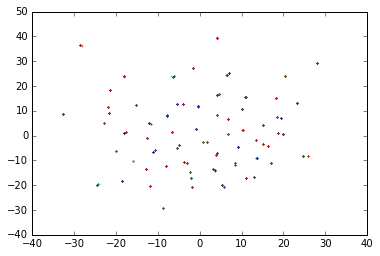

None


In [146]:
model = TSNE(n_components=2, random_state=1)
feats_x = model.fit_transform(scale(feats))
sorted_x =sorted(feats_x, key=lambda d:d[0], reverse = False)
print feats.shape
#show(feats, labels[:400])
#Plot.scatter(feats[:,0],feats[:,1],)
print show(feats_x,labels)

In [148]:
from sklearn.cross_validation import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(feats_x, labels, test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.1415929203539823